In [11]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium

In [80]:
#datasets 
subscription_fee = pd.read_csv('/Users/evgeniy/Downloads/archive-2/Netflix subscription fee Dec-2021.csv')
country_coordinates = pd.read_csv('https://raw.githubusercontent.com/albertyw/avenews/\
6f2d89a5f68807348400869fb560e0a2bee94809/old/data/average-latitude-longitude-countries.csv')

In [70]:
#statisics 
subscription_fee.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000


In [79]:
#data types and na
subscription_fee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


There are 65 countries in dataset, without na samples

In [78]:
#sum duplicates
print(f'Duplicates sum: {subscription_fee.duplicated().sum()}')

Duplicates sum: 0


In [83]:
# Make an empty map
m = folium.Map(location=[4,0], tiles="OpenStreetMap", zoom_start=2)

for i in subscription_fee['Country_code'].values:
    folium.Circle(
      location=[country_coordinates.loc[country_coordinates['ISO 3166 Country Code'] == str.upper(i), 
                                        'Latitude'].values[0], 
                country_coordinates.loc[country_coordinates['ISO 3166 Country Code'] == str.upper(i), 
                                        'Longitude'].values[0]
               ],
      popup=subscription_fee.loc[subscription_fee['Country_code'] == i, 'Total Library Size'].values[0],
      radius=float(subscription_fee.loc[subscription_fee['Country_code'] == i, 'Total Library Size'].values[0] * 15),
      color='crimson',
      fill=True,
      fill_color='crimson',
    tooltip='Total Library Size by country').add_to(m)

# Show the map
print('Total Library Size by country')
m

Total Library Size by country


In [84]:
subscription_fee.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


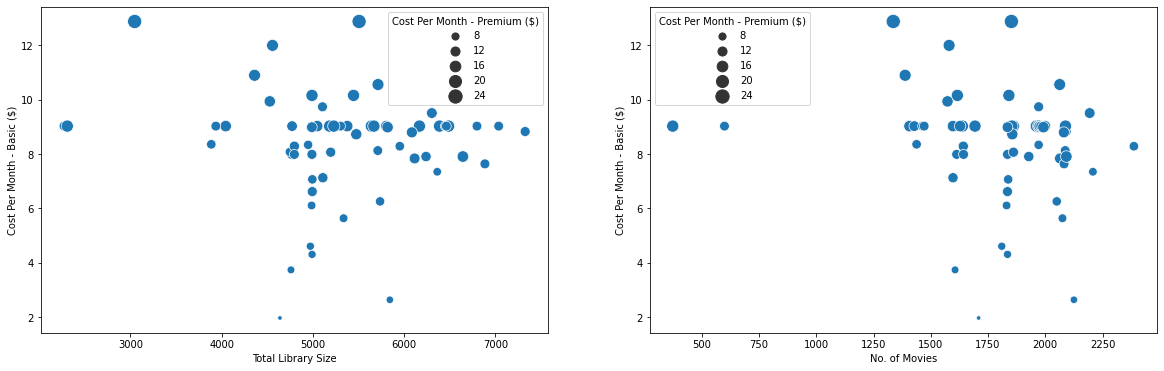

In [97]:
#cost vs total library size dependencies
_, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.scatterplot(data=subscription_fee, x="Total Library Size", y="Cost Per Month - Basic ($)", 
                size="Cost Per Month - Premium ($)", sizes=(20, 200), ax=axes[0])
sns.scatterplot(data=subscription_fee, x="No. of Movies", y="Cost Per Month - Basic ($)", 
                size="Cost Per Month - Premium ($)", sizes=(20, 200), ax=axes[1]);

So, it's seems, the cost does not depend on the size of the library or no. movies 

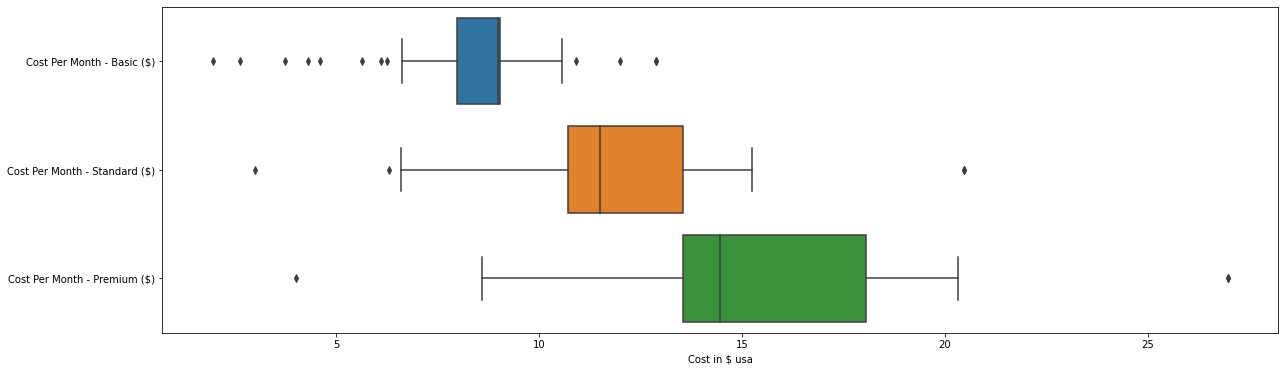

In [124]:
#costs distributions and outliers 
plt.figure(figsize=(20, 6))
sns.boxplot(data=subscription_fee.loc[:, ['Cost Per Month - Basic ($)', 
                                          'Cost Per Month - Standard ($)',
                                          'Cost Per Month - Premium ($)']
                                     ], 
            orient='h')
plt.xlabel('Cost in $ usa');

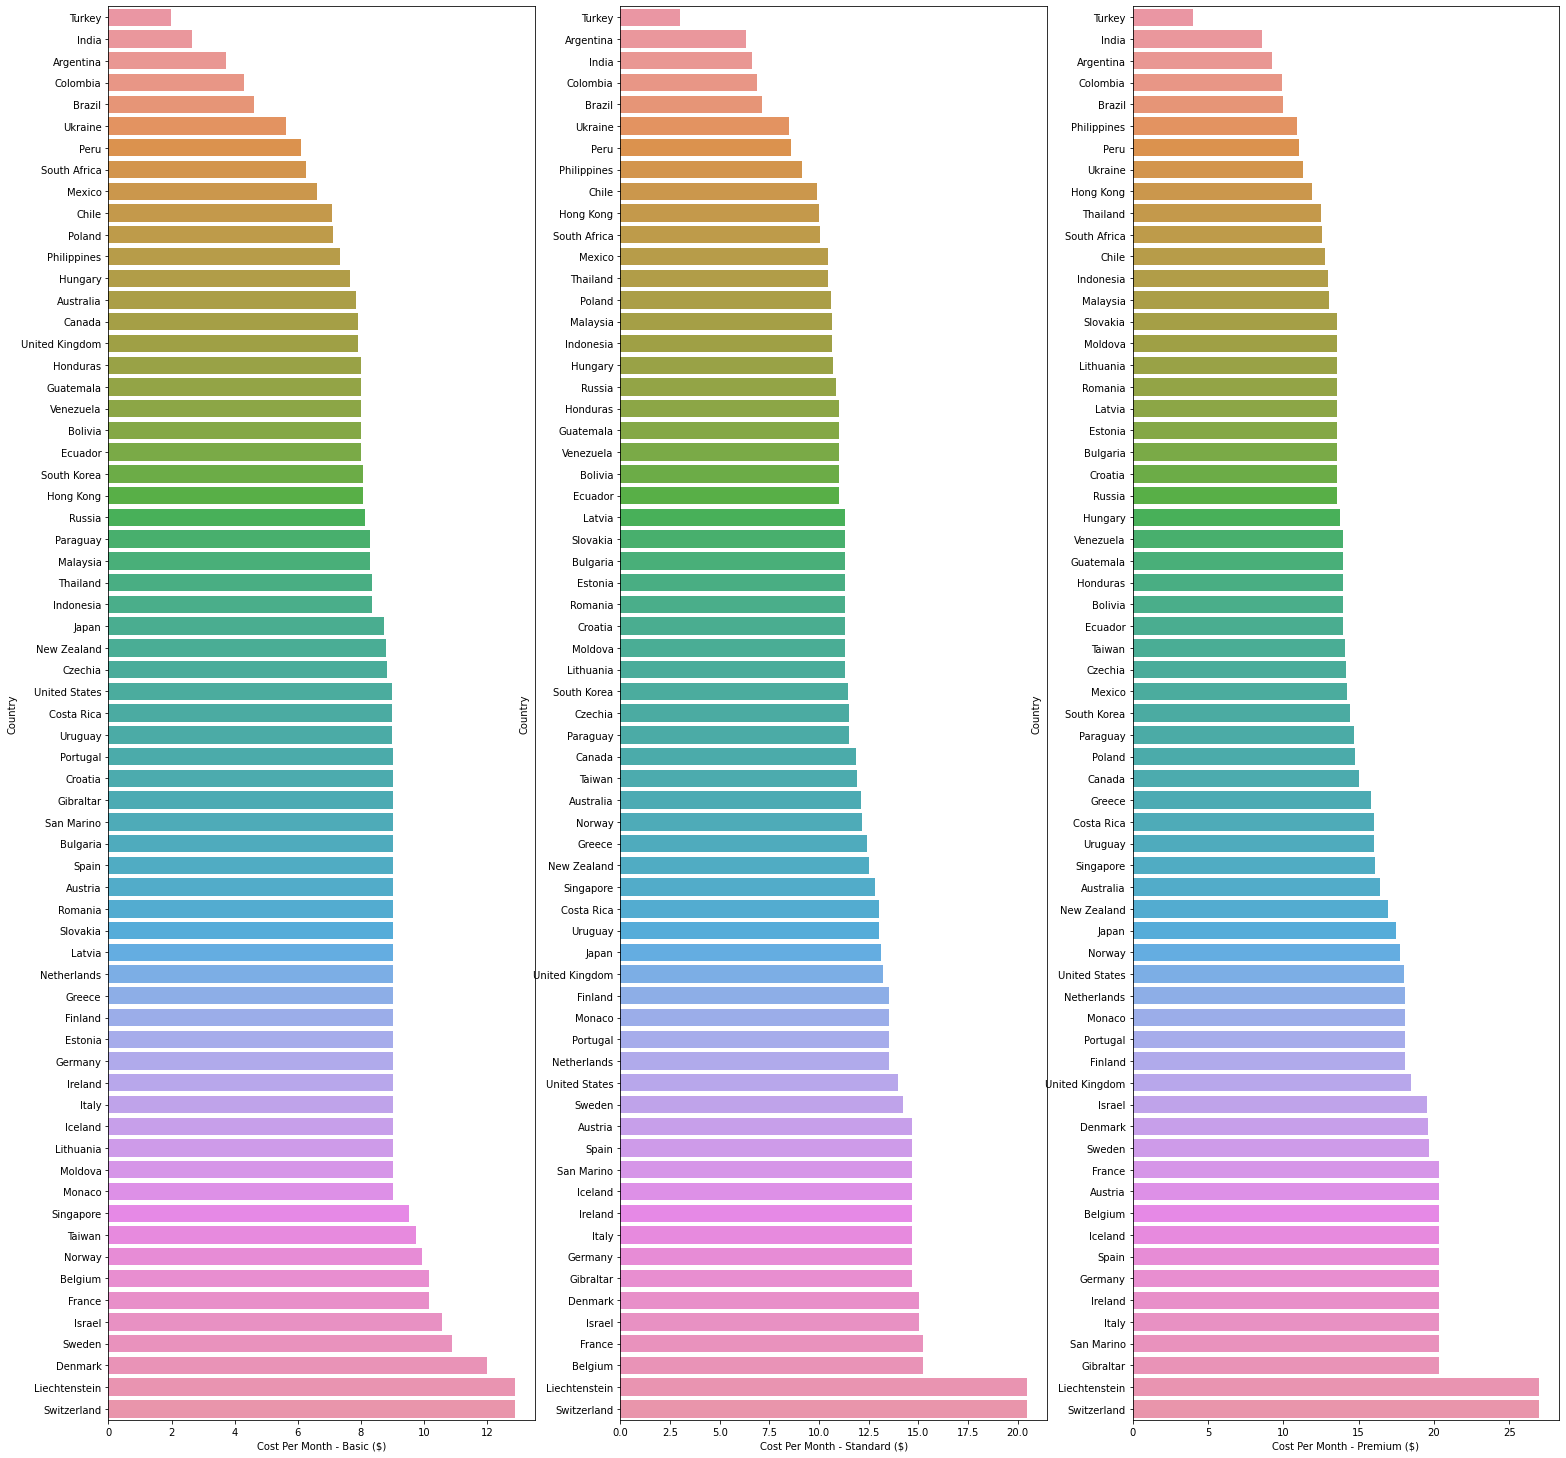

In [133]:
_, axes = plt.subplots(1, 3, figsize=(26, 26))
sns.barplot(data=subscription_fee.sort_values(by='Cost Per Month - Basic ($)'),
            x='Cost Per Month - Basic ($)', y='Country', ax=axes[0])
sns.barplot(data=subscription_fee.sort_values(by='Cost Per Month - Standard ($)'),
            x='Cost Per Month - Standard ($)', y='Country', ax=axes[1])
sns.barplot(data=subscription_fee.sort_values(by='Cost Per Month - Premium ($)'),
            x='Cost Per Month - Premium ($)', y='Country', ax=axes[2]);

The order in pricing of subscriptions by category is not linear. For example, United Kingdom in basic category is in a bottom pf the list, in Standard category slightly above the middle of the list and in Premium category more higher then middle. It's seems the influence of regional features and legislation 

In [140]:
data_basic=subscription_fee.sort_values(by='Cost Per Month - Basic ($)')
data_std=subscription_fee.sort_values(by='Cost Per Month - Standard ($)')
data_prem=subscription_fee.sort_values(by='Cost Per Month - Premium ($)')